In [12]:
# !pip freeze > requirements.txt
# !pip install -r requirements.txt

In [1]:
import os
import pandas as pd
from src.data_processor import DataProcessor
from src.risk_factor_analyzer import RiskFactorAnalyzer
import yaml
from config_handler import handle_configs

pd.set_option('display.max_columns', 100)

# Загрузка данных

In [2]:
# Загружаем пути к данным, подгружаем конфиг
files = os.listdir('data')
files = [file for file in files if file.split('.')[-1] == 'csv']
file_names = [file.split('.')[0] for file in files]
file_paths = {file_name: file for file_name, file in zip(file_names, list(map(lambda x: 'data/' + x, files)))}

config = handle_configs('config.yaml')

In [3]:
# Пример создания списка торговых дней
start_date = '2020-01-01'
end_date = '2024-01-01'
trading_days = pd.DataFrame({'date': pd.date_range(start=start_date, end=end_date, freq='B')})

In [4]:
# Инициализируем процессор данных
data_processor = DataProcessor(trading_days)

In [5]:
# Загружаем и объединяем данные
data_frames = data_processor.load_data(file_paths)
renamed_data_frames = data_processor.rename_columns(data_frames)
all_data = data_processor.merge_data(renamed_data_frames)
cleaned_data = data_processor.clean_data(all_data)
filled_data = data_processor.fill_missing_data(cleaned_data, method='ffill')
full_data = filled_data.dropna()

data/moex_ind.csv
data/CHMF.csv
data/cdv_int_rate.csv
data/gazp.csv
data/ROSN.csv
data/SU46023RMFS6.csv
data/SNGSP.csv
data/sber.csv
data/STSB.csv
data/MGNT.csv
data/brent_prices.csv
data/SU26212RMFS9.csv
data/GMKN.csv
data/eur_rate.csv
data/int_rate.csv
data/LPSB.csv
data/rts_ind.csv
data/SU29020RMFS3.csv
data/usd_rate.csv
data/LKOH.csv
data/SU29015RMFS3.csv
data/SU29009RMFS6.csv


In [6]:
# #на случай если мы захотим удалить ненужные столбцы с ценами всего что не закрытие
prefixes_to_drop = ['OPEN', "HIGH", "LOW", "<VOL>", "Ставка купона", "Размер выплаты", "Номинал", ]
for prefix in prefixes_to_drop:
    full_data = full_data.loc[:, ~full_data.columns.str.contains(prefix)]
full_data = full_data.rename(columns=config['rename'])
full_data

,date,Индекс_МосБиржи,Северсталь,Компонент_процентной_ставки_1,Компонент_процентной_ставки_2,Газпром_Нефть,Роснефть,ОФЗ_46023,Сургутнефтегаз,Сбербанк,Ставропольэнергосбыт,Магнит,Цена_нефти_Brent,ОФЗ_29020,Норильский_Никель,Курс_евро,Уровень_ставки ЦБ,ЛЭСК,Индекс_РТС,ОФЗ_26212,Курс_доллара_США,Лукойл,ОФЗ_29015,ОФЗ_29009
225,2020-11-11,3015.03,1096.4,-4.132120,-0.000236,170.53,419.35,110.799,38.600,244.20,0.5235,4780.0,43.80,108.934,205.10,76.3978,4.25,8.00,1233.81,97.150,76.3978,4945.0,96.899,109.000
226,2020-11-12,3025.83,1091.4,-4.133860,0.018300,172.91,412.30,110.799,38.600,242.08,0.5265,4910.0,43.53,109.000,204.48,76.2075,4.25,8.10,1238.45,97.199,76.2075,4853.0,96.929,108.198
227,2020-11-13,3025.22,1109.0,-4.165482,-0.004851,180.30,419.35,109.000,39.135,242.99,0.5255,4932.0,42.78,109.145,204.86,77.1148,4.25,8.00,1227.78,97.150,77.1148,4879.0,96.929,108.168
228,2020-11-16,3079.74,1132.0,-4.129078,0.019168,185.32,430.95,110.992,39.235,247.99,0.5340,4982.0,43.82,109.199,207.80,77.1148,4.25,8.00,1268.61,97.095,77.1148,4932.5,96.810,108.250
229,2020-11-17,3052.22,1116.2,-4.098544,0.030430,182.90,438.85,110.999,38.810,245.70,0.5325,4891.5,43.75,109.180,206.02,76.9197,4.25,8.05,1258.46,97.229,76.9197,4864.0,96.810,108.153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,2023-12-26,3094.72,1375.2,6.049706,0.585122,161.00,589.30,96.518,57.000,271.90,2.0650,6920.5,81.07,86.160,163.60,91.9690,16.00,30.45,1063.05,100.001,91.9690,6771.0,99.641,102.985
1040,2023-12-27,3097.49,1382.0,5.947767,0.929119,159.86,594.55,96.400,56.160,271.08,2.1250,6982.5,79.65,86.203,163.10,91.7069,16.00,29.25,1068.71,100.304,91.7069,6768.0,100.000,103.140
1041,2023-12-28,3101.99,1408.0,5.843498,0.743916,159.14,591.90,96.326,55.340,271.74,2.0950,6970.0,78.39,86.331,161.56,91.7051,16.00,28.45,1090.93,100.180,91.7051,6767.0,100.002,103.251
1042,2023-12-29,3099.11,1407.0,6.020546,1.095758,159.52,593.20,96.655,55.350,270.82,2.1100,7006.0,77.04,86.328,161.72,90.3041,16.00,28.45,1083.48,99.911,90.3041,6739.0,99.664,103.329


In [7]:
# Инициализация и использование класса
analyzer = RiskFactorAnalyzer(full_data)
analyzer.handle_missing_data()
analyzer.fill_missing_data()

/Users/stepantihomirov/Code/HSE/Risk_Managment/market_risk/src/risk_factor_analyzer.py:112: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  self.data.fillna(method='ffill', inplace=True)


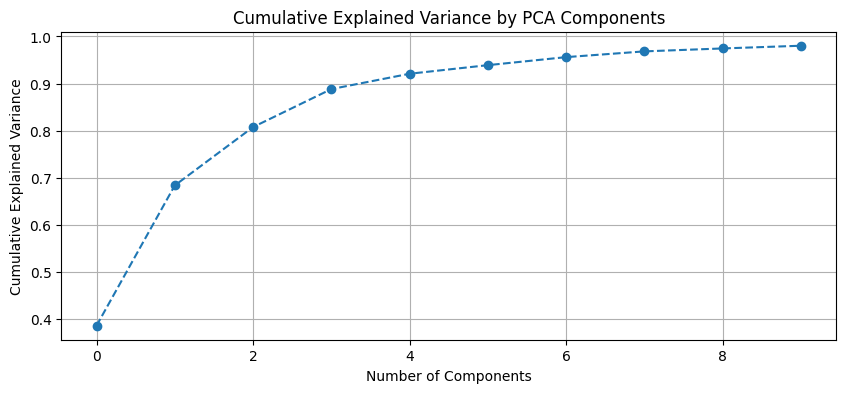

In [8]:
# Выполнение PCA
analyzer.perform_pca(n_components=10)
analyzer.plot_pca_variance()

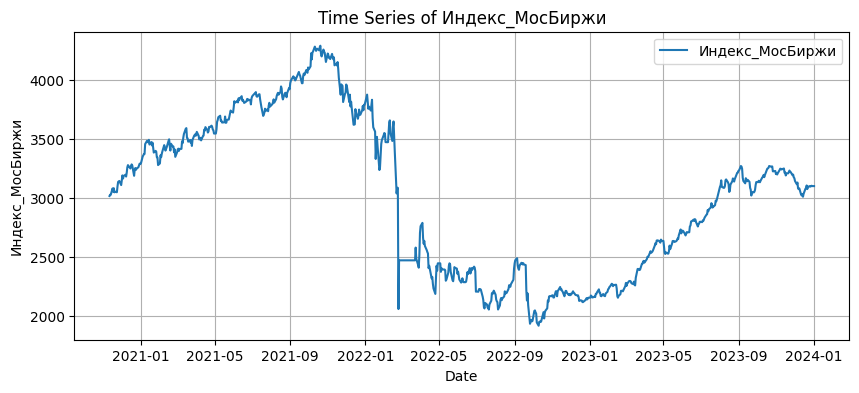

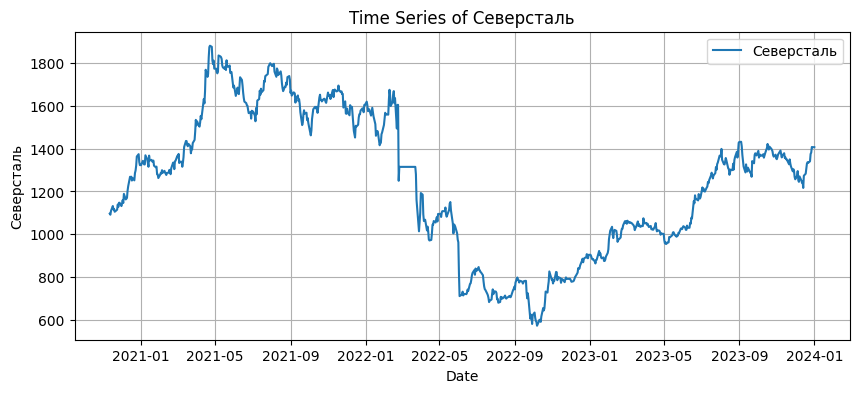

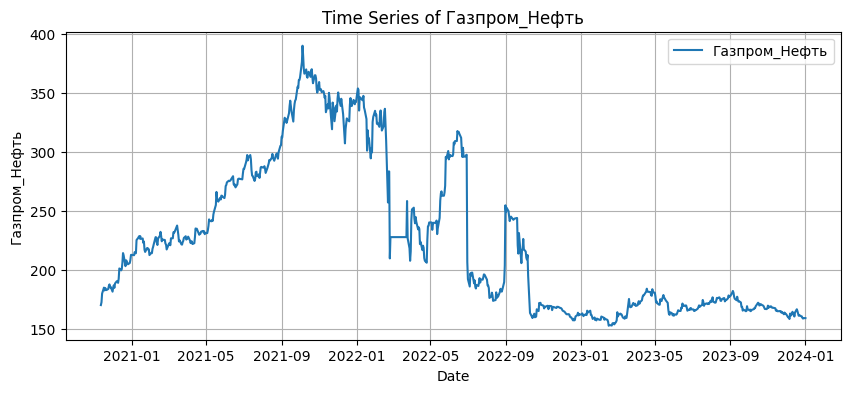

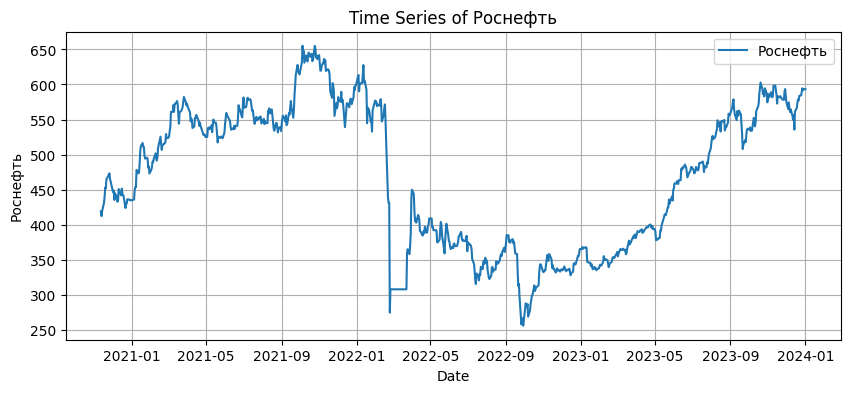

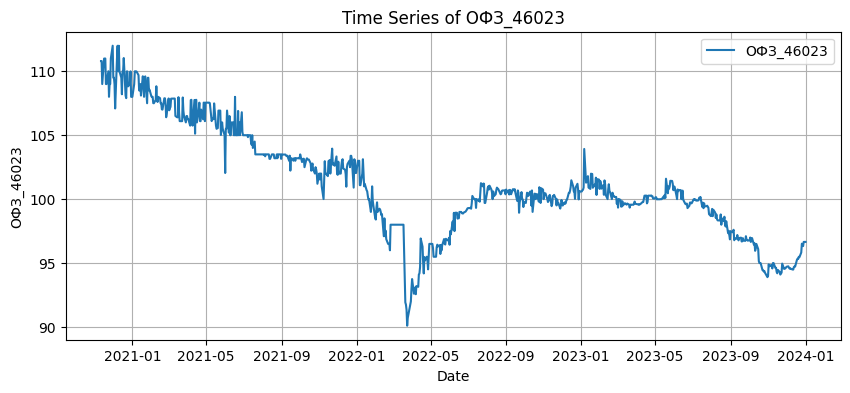

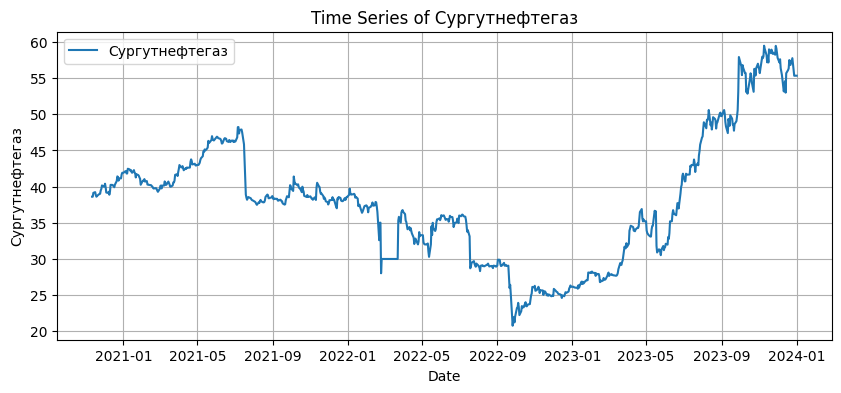

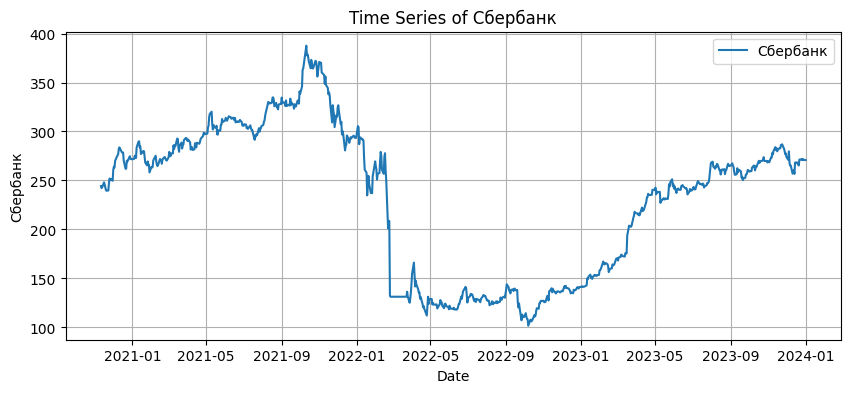

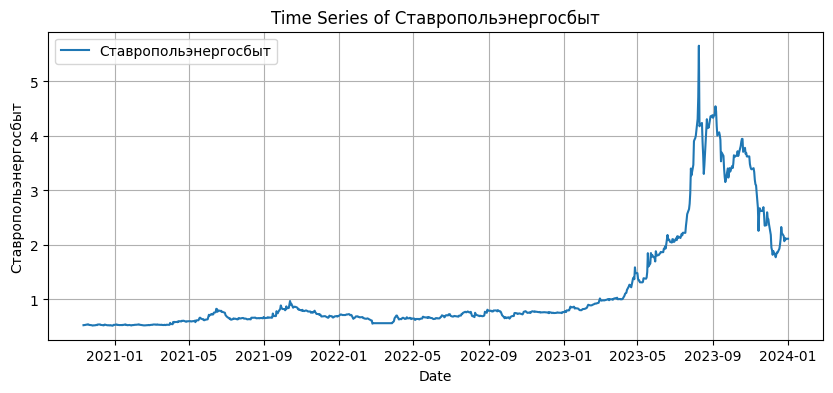

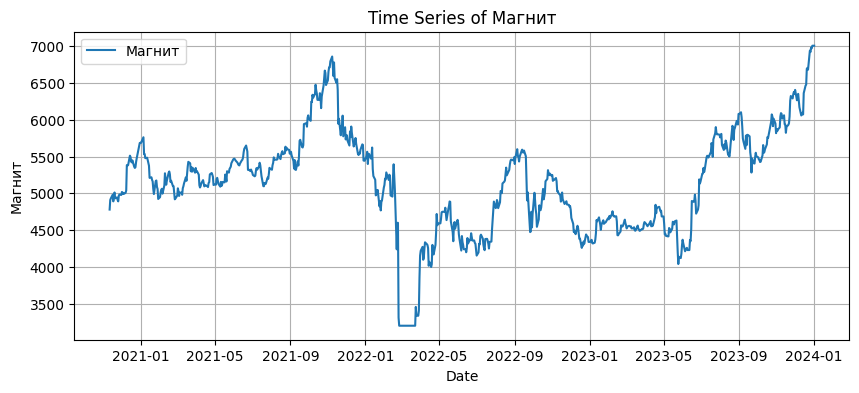

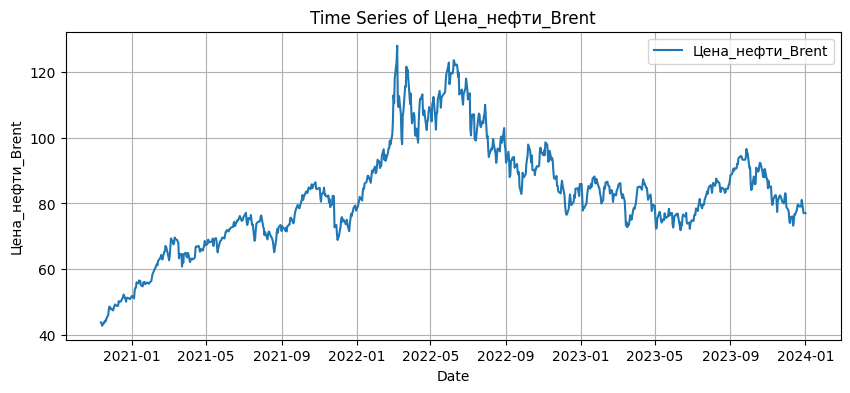

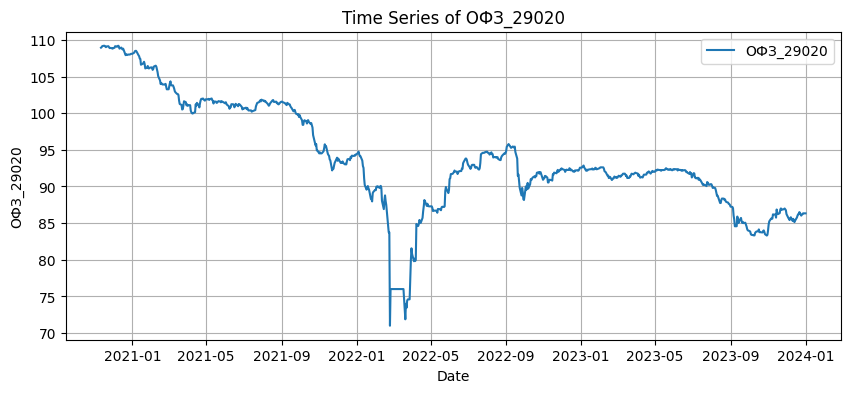

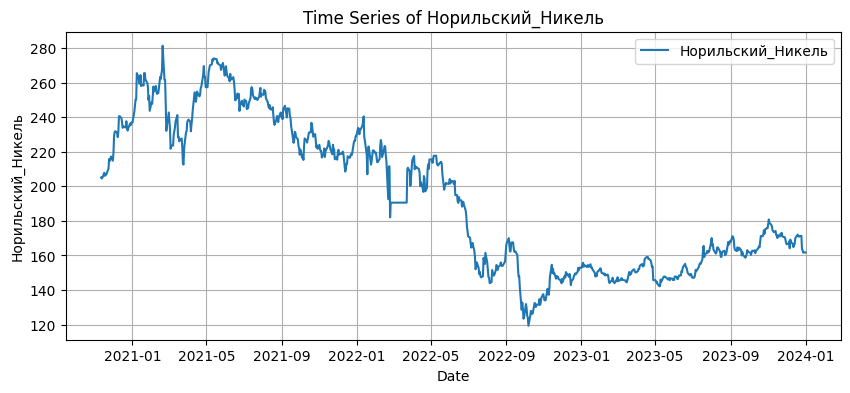

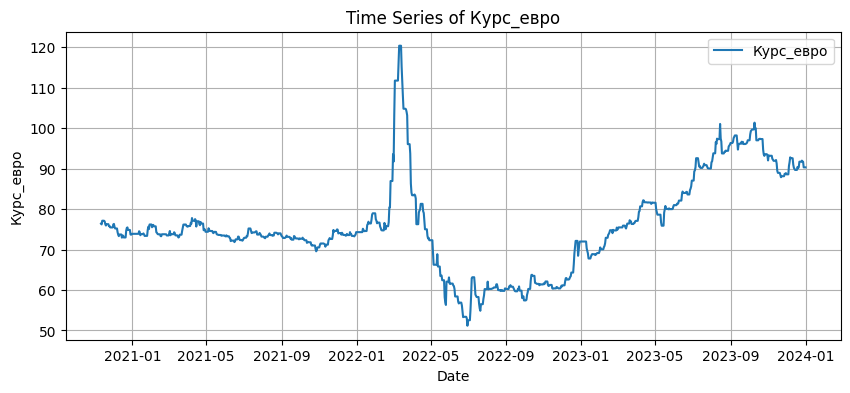

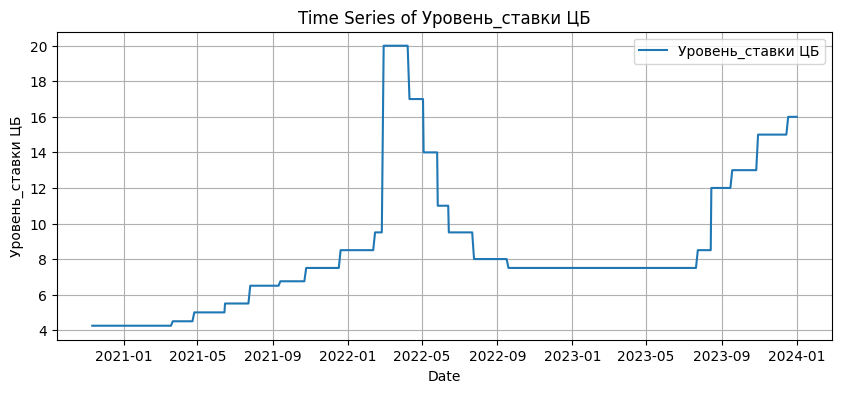

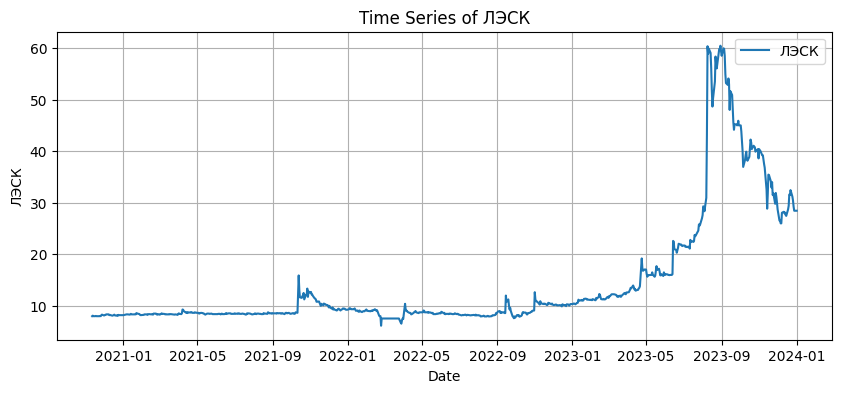

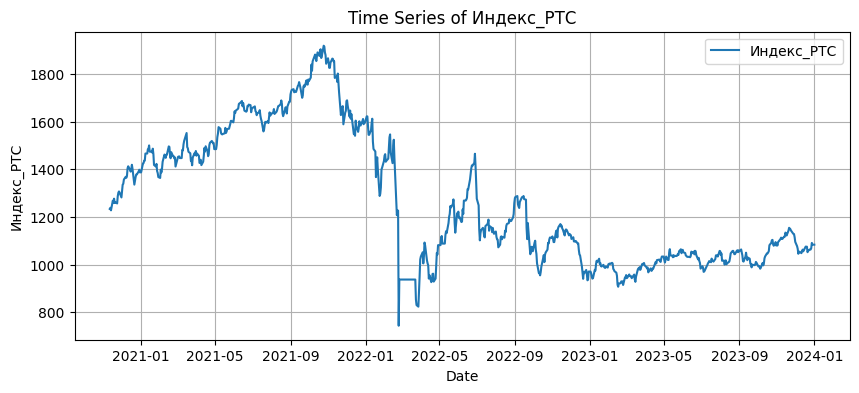

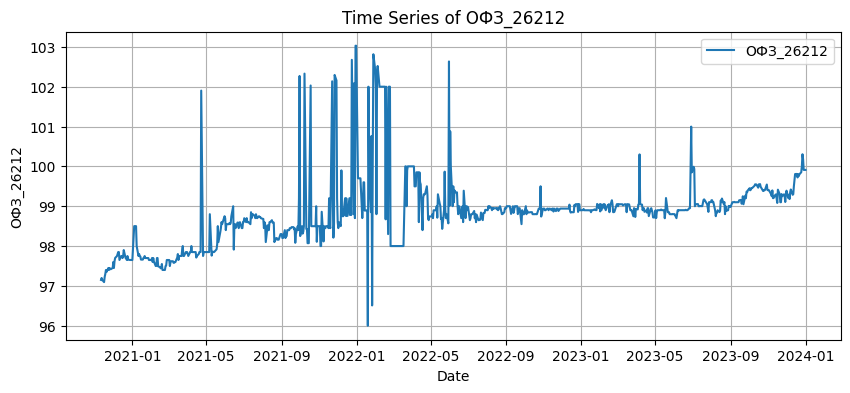

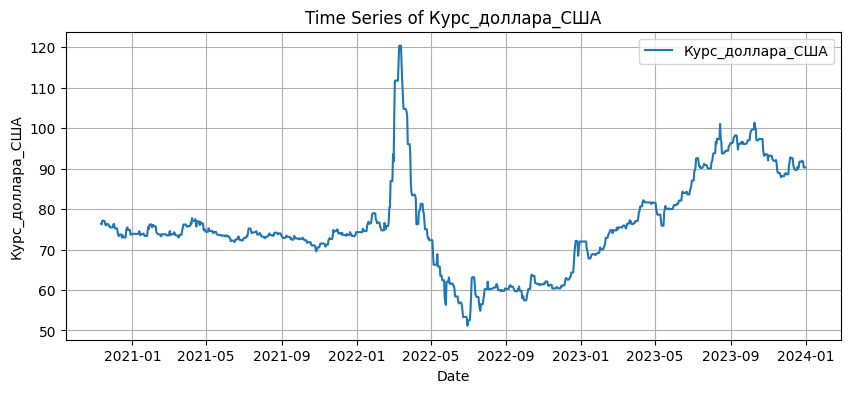

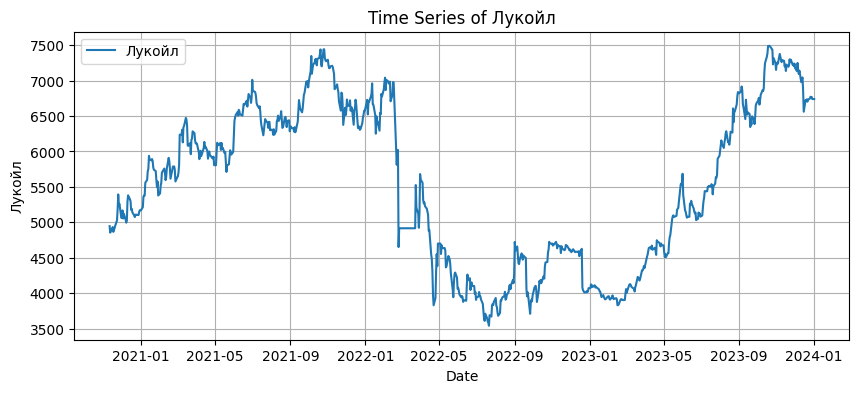

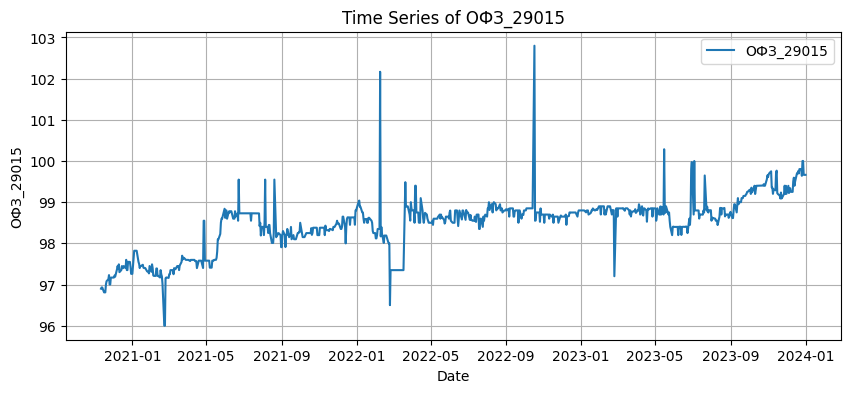

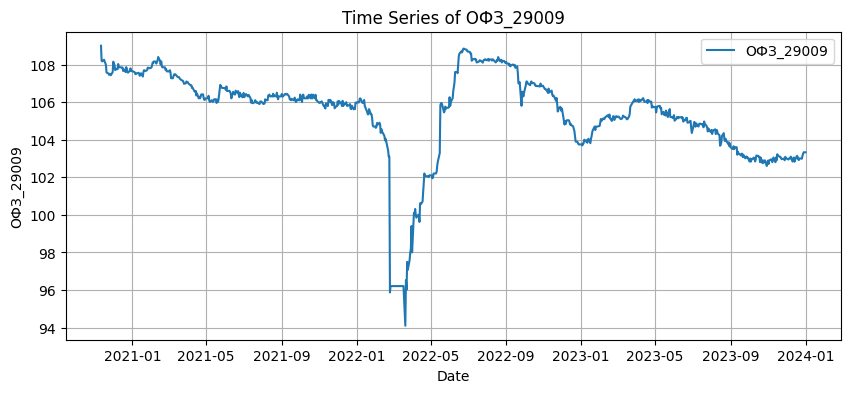

In [20]:
# Визуализация риск-факторов
analyzer.visualize_risk_factors()

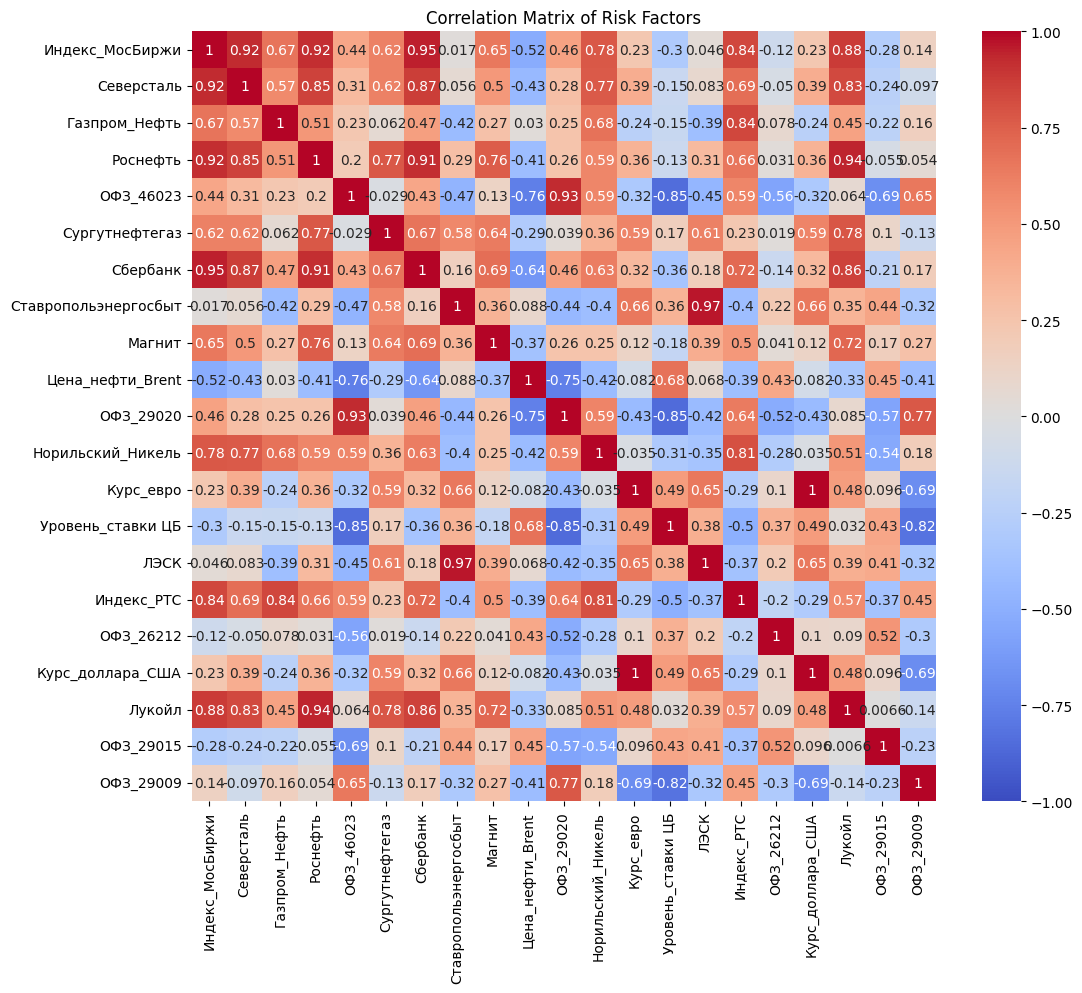

In [21]:
# Корреляционная матрица
analyzer.plot_correlation_matrix()

In [22]:
# Описательная статистика
stats = analyzer.descriptive_statistics()
stats

,count,mean,std,min,25%,50%,75%,max,kurtosis,skewness
Индекс_МосБиржи,819.0,3007.525079,659.022795,1916.9700,2376.57500,3093.6400,3549.91000,4287.5200,-1.280138,0.105669
Северсталь,819.0,1240.218315,329.303563,572.6000,1002.70000,1291.0000,1533.90000,1881.2000,-1.039168,-0.105934
Газпром_Нефть,819.0,225.341392,63.533632,153.0900,169.59000,212.8300,275.58000,389.8200,-0.706456,0.760281
Роснефть,819.0,468.722222,101.882494,256.0500,369.82500,482.3500,558.12500,655.2500,-1.371056,-0.138507
ОФЗ_46023,819.0,101.177444,4.178608,90.1000,98.93550,100.4990,103.49700,111.9980,-0.236324,0.306564
Сургутнефтегаз,819.0,37.951331,8.679837,20.7450,31.22500,38.1350,42.18000,59.5000,-0.190706,0.450987
Сбербанк,819.0,231.282051,75.513985,101.5000,140.01000,256.4000,286.93000,387.6000,-1.252956,-0.238332
Ставропольэнергосбыт,819.0,1.153392,0.977046,0.5135,0.64375,0.7295,0.99950,5.6530,3.179148,2.046385
Магнит,819.0,5131.352869,692.406944,3202.0000,4610.00000,5169.0000,5546.25000,7006.0000,0.520870,-0.132328
Цена_нефти_Brent,819.0,82.357546,16.005308,42.7800,73.43500,81.9900,90.90500,127.9800,0.204052,0.198452


Коэффициенты эксцесса (kurtosis) и асимметрии (skewness) являются важными статистическими показателями, которые помогают описывать распределение данных. Вот их определения и интерпретации:

### 1. Асимметрия (Skewness)

**Определение:**
Асимметрия измеряет степень и направление асимметрии распределения данных. Она показывает, насколько распределение отклоняется от нормального распределения влево или вправо.

**Интерпретация:**
- **Skewness = 0**: Распределение является симметричным. Это характерно для нормального распределения.
- **Skewness > 0**: Распределение имеет положительную асимметрию (правостороннюю). Это означает, что хвост справа длиннее или "тяжелее", чем хвост слева. В этом случае большая часть значений сосредоточена слева от среднего значения.
- **Skewness < 0**: Распределение имеет отрицательную асимметрию (левостороннюю). Это означает, что хвост слева длиннее или "тяжелее", чем хвост справа. В этом случае большая часть значений сосредоточена справа от среднего значения.

### 2. Эксцесс (Kurtosis)

**Определение:**
Эксцесс измеряет "тяжесть хвостов" распределения, т.е. насколько хвосты распределения более тяжелые или легкие по сравнению с нормальным распределением.

**Интерпретация:**
- **Kurtosis < 3**: Распределение имеет отрицательный эксцесс (платикуртическое распределение). Это означает, что хвосты распределения легче, а пик распределения более плоский по сравнению с нормальным распределением.
- **Kurtosis = 3**: Распределение имеет нулевой эксцесс (мезокуртическое распределение). Это характерно для нормального распределения.
- **Kurtosis > 3**: Распределение имеет положительный эксцесс (лептокуртическое распределение). Это означает, что хвосты распределения тяжелее, а пик распределения более острый по сравнению с нормальным распределением.

### Примеры:

- **Положительная асимметрия (Skewness > 0)**: Представьте распределение доходов, где большинство людей зарабатывают в пределах среднего дохода, но небольшое количество людей зарабатывает значительно больше. Это создаст длинный правый хвост.

- **Отрицательная асимметрия (Skewness < 0)**: Представьте распределение оценок на экзамене, где большинство студентов получают высокие оценки, но небольшое количество студентов получает значительно низкие оценки. Это создаст длинный левый хвост.

- **Положительный эксцесс (Kurtosis > 3)**: Например, в финансовых данных, где есть частые небольшие колебания и редкие, но значительные выбросы. Это создаст распределение с тяжелыми хвостами и острым пиком.

- **Отрицательный эксцесс (Kurtosis < 3)**: Например, если данные равномерно распределены, то их пик будет более плоским, а хвосты менее тяжелыми по сравнению с нормальным распределением.

### Применение в анализе данных:

Эти показатели помогают понять распределение данных, что важно при анализе риска и принятии решений. В финансовых данных, например, положительный эксцесс может указывать на повышенные риски экстремальных изменений цен, что необходимо учитывать при разработке стратегий управления рисками.

In [ ]:
# Анализ трендов, сезонности и стационарности для примера колонки 'gazp'
analyzer.trend_seasonality_stationarity('brent_prices_price')

In [ ]:
analyzer.visualize_histograms()

In [ ]:
analyzer.visualize_boxplots()